In [ ]:
# 之前講解，Python在資料數據上的基本操作，今天要來談談什麼是機器學習(Machine Learning)
# 簡單來說，就是讓機器去學習，機器要如何去學習呢?

# 1.篩選出正確需要的資料
# 2.將資料分類
# 3.訓練資料(包含訓練及測試兩階段)
# 4.將訓練完成的知料模型來預測未來資料

# 利用python的numpy、pandas可以做許多資料的基本操作，像是可以把蒐集到有缺失值的資料刪除，也可以篩選出某個資料的關鍵屬性...等
# 接著將資料依據資料的屬性作正確的方式分類，並使用正確的演算法，例如：支持向量機（SVM)、隨機梯度下降（SGD）、決策樹（Decision Trees）...等
# 再來將分類完成的大量資料分為訓練資料及測試資料。

# 為什麼要有測試資料呢?因為在資料訓練上，訓練模型只會越來越好(訓練的精確值越來越高)，為了避免過度擬合(Over fitting)的狀況
# 可以利用測試資料來確認，訓練完成的資料模型的測試出來的資料是否值得信任，最後，就可以利用訓練完成資料模型來預測未來的數據。

In [ ]:
# SKlearn在python中提供大量常見的機器學習演算法和許多實用的資料集合，像是Iris以及手寫辨識數字的資料(之後的程式舉例會用到)。
# http://scikit-learn.org/stable/_static/ml_map.png
# 而演算法的部分，可以在SKlearn官網中看到，他將功能分為6個部分：
# Classification
# Regression
# Clustering
# Model selection
# Preprocessing
# Dimensionality reduction
# 各個適合的演算法，在SKlearn中也有做相當清楚的圖表，呈現該演算法資料輸出的型態，相當方便

In [2]:
# 安裝Scikit-learn(SKlearn)
# pip install scikit-learn

# documents
# https://scikit-learn.org/stable/

# 匯入 sklearn 套件
import sklearn
print(sklearn.__version__)
print(sklearn.__file__)

0.22.1
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\__init__.py


In [4]:
# 檢視 sklearn 內建的玩具資料集
from sklearn import datasets
lists = dir(datasets)
for e in lists:
    if e.startswith('load'):
        print(e)

load_boston
load_breast_cancer
load_diabetes
load_digits
load_files
load_iris
load_linnerud
load_sample_image
load_sample_images
load_svmlight_file
load_svmlight_files
load_wine


In [10]:
iris = datasets.load_iris()
print(iris.DESCR)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

In [19]:
# 檢視sklearn內建的創建資料集function
from sklearn import datasets
lists = dir(datasets)
for e in lists:
    if e.startswith('make'):
        print(e)

make_biclusters
make_blobs
make_checkerboard
make_circles
make_classification
make_friedman1
make_friedman2
make_friedman3
make_gaussian_quantiles
make_hastie_10_2
make_low_rank_matrix
make_moons
make_multilabel_classification
make_regression
make_s_curve
make_sparse_coded_signal
make_sparse_spd_matrix
make_sparse_uncorrelated
make_spd_matrix
make_swiss_roll


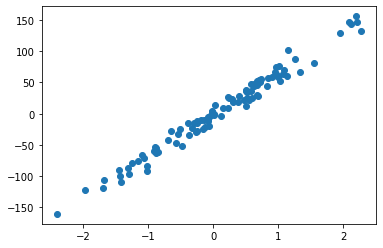

In [105]:
# make_regression 生成回歸資料集
import matplotlib.pyplot as plt
X, y = datasets.make_regression(n_samples=100, n_features=1, noise=10, random_state=78)
plt.scatter(X, y)
plt.show()

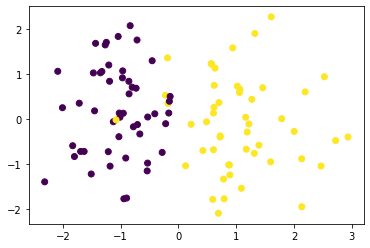

In [86]:
# make_classification 生成分類資料集
import matplotlib.pyplot as plt
X, y = datasets.make_classification(n_samples=100, n_classes=2, random_state=78)
plt.scatter(X[:, 0], X[:, 1], c=y)
plt.show()

In [75]:
# 檢視 sklearn 前處理函數
from sklearn import preprocessing         
dir(preprocessing)

['Binarizer',
 'FunctionTransformer',
 'KBinsDiscretizer',
 'KernelCenterer',
 'LabelBinarizer',
 'LabelEncoder',
 'MaxAbsScaler',
 'MinMaxScaler',
 'MultiLabelBinarizer',
 'Normalizer',
 'OneHotEncoder',
 'OrdinalEncoder',
 'PolynomialFeatures',
 'PowerTransformer',
 'QuantileTransformer',
 'RobustScaler',
 'StandardScaler',
 '__all__',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__path__',
 '__spec__',
 '_csr_polynomial_expansion',
 '_data',
 '_discretization',
 '_encoders',
 '_function_transformer',
 '_label',
 'add_dummy_feature',
 'binarize',
 'label_binarize',
 'maxabs_scale',
 'minmax_scale',
 'normalize',
 'power_transform',
 'quantile_transform',
 'robust_scale',
 'scale']

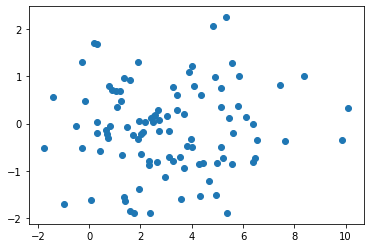

In [61]:
# StandardScaler基礎標準化即為高斯分佈。使得數據的平均值為0，方差為1。
from sklearn.preprocessing import StandardScaler
import numpy as np
X, y = np.random.normal(3, 2.5, size=(100, 1)), np.random.randn(100, 1)
plt.scatter(X, y)
plt.show()

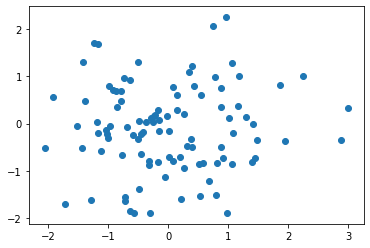

In [62]:
scaler = StandardScaler().fit(X)
X_scaled = scaler.transform(X)
plt.scatter(X_scaled, y)
plt.show()

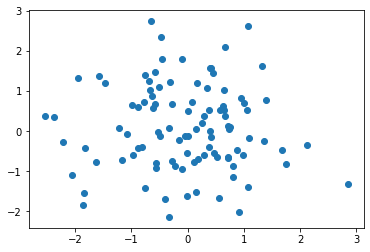

In [63]:
# MinMaxScaler最小最大值標準化，給定了一個明確的最大值與最小值史資料符合。
from sklearn.preprocessing import MinMaxScaler
X, y = np.random.randn(100, 1), np.random.randn(100, 1)
plt.scatter(X, y)
plt.show()

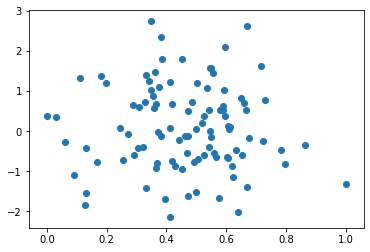

In [64]:
scaler = MinMaxScaler(feature_range=(0, 1)).fit(X)
X_scaled = scaler.transform(X)
plt.scatter(X_scaled, y)
plt.show()